# 특성값을 이용하여 BMI 값을 예측하기(회귀)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/tansy/Ai/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Outcome(레이블) 제거

In [79]:
df = df.drop('Outcome', axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


# 상관관계 행렬을 히트맵으로 표시

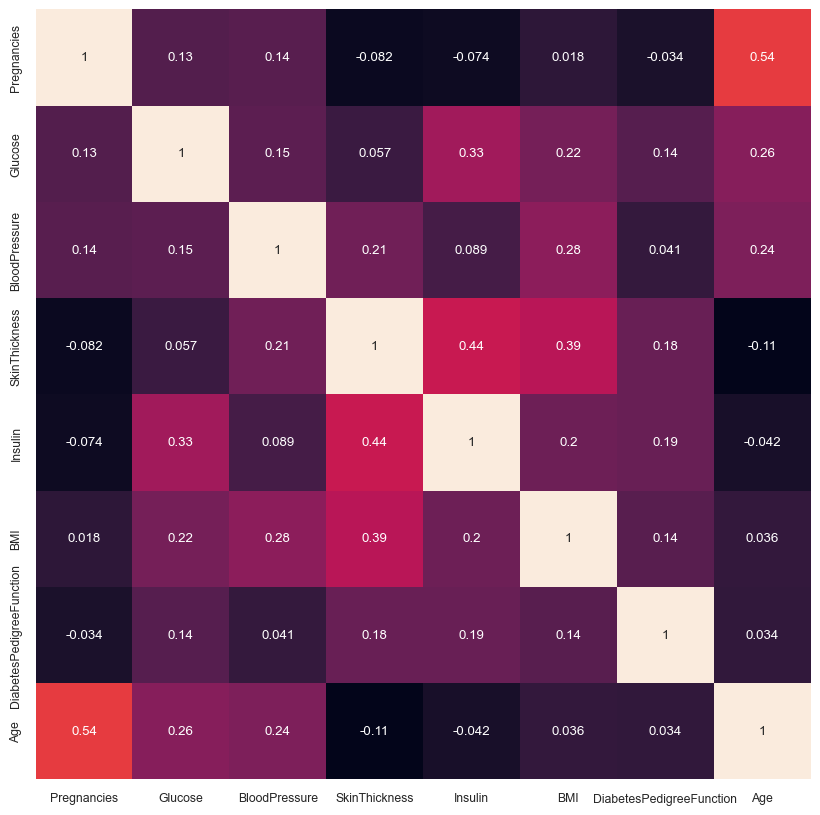

In [9]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr() # 상관관계 행렬 

#히트맵
plt.figure(figsize=(10,10)) 
sns.set(font_scale=0.8)  
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# BMI와 높은 건  SkinThickness (0.39) 

# 1. 데이터 준비

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [80]:
X = df.drop('BMI',axis=1) 
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33


In [112]:
y = df['BMI'] 
y.head()

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

# 딥러닝 입력을 위해 Numpy로 변환

In [82]:
X = X.values
X

array([[  6.   , 148.   ,  72.   , ...,   0.   ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.   ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,   0.   ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ..., 112.   ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,   0.   ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.   ,   0.315,  23.   ]])

# 훈련, 검증 데이터셋 준비

In [113]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [114]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 7), (614,), (154, 7), (154,))

In [115]:
input_dim = X_train.shape[1]
print(input_dim)

7


# 회귀 모델 구축 

In [159]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from keras.layers import Dropout

model = Sequential()

model.add(Dense(64,input_shape=(input_dim,),activation='relu')) # input_shape => 입력 데이터의 형태를 알 수 있게 해줌 
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1)) # 활성화 함수 없음 

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse']) # 회귀 문제에서 손실함수는 mse <=> 분류 문제 

model.summary()

C:\Users\tansy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_82 (Dense)                     │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

In [160]:
N_EPOCHS = 50

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 537.8619 - mse: 537.8619 - val_loss: 85.4636 - val_mse: 85.4636
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 247.9378 - mse: 247.9378 - val_loss: 106.4655 - val_mse: 106.4655
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 197.7853 - mse: 197.7853 - val_loss: 67.2109 - val_mse: 67.2109
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 178.1241 - mse: 178.1241 - val_loss: 74.6708 - val_mse: 74.6708
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 175.2509 - mse: 175.2509 - val_loss: 109.7076 - val_mse: 109.7076
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 120.7338 - mse: 120.7338 - val_loss: 81.4159 - val_mse: 81.4159
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 138.4285 - mse: 138.4285 - val_loss: 73.5252 - val_mse: 73.5252
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 139.9523 - mse: 139.9523 - val_loss: 60.4329 - val_mse: 60.4329
Epoch 9/50
20/20

# 모델 평가 

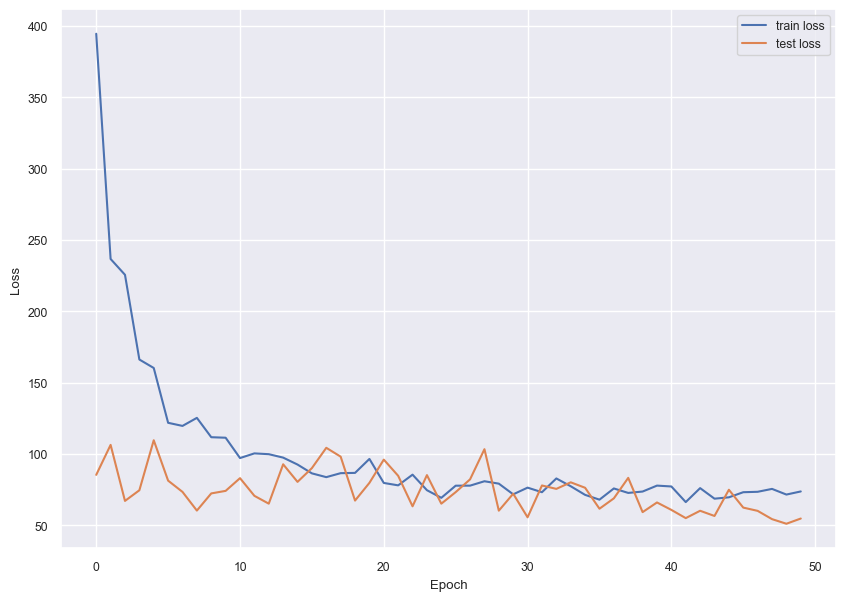

In [161]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

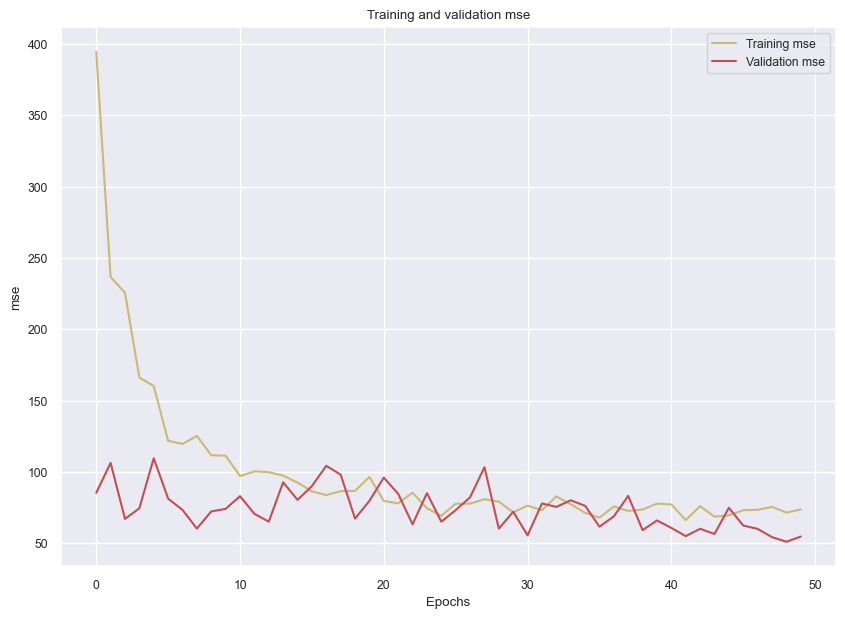

In [162]:
# mse체크 
mse =history.history['mse']
val_mse =history.history['val_mse']
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), mse, 'y', label='Training mse')
plt.plot(range(N_EPOCHS), val_mse, 'r', label='Validation mse')
plt.title('Training and validation mse')
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.legend()
plt.show()

In [163]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 53.5746 - mse: 53.5746 


[54.862735748291016, 54.862735748291016]

# 실제값 예측값 비교(산점도)

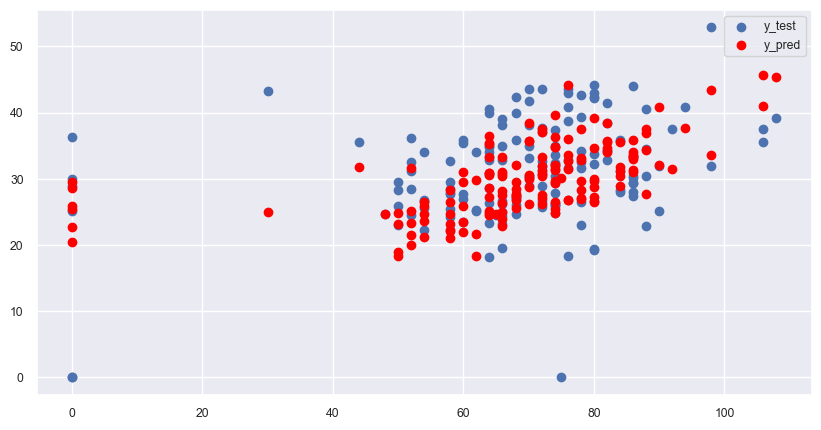

In [165]:
#y_test = np.argmax(y_test, axis=1) 원 핫 인코딩 => 정수값으로 변환함 
#y_pred = np.argmax(y_pred, axis=1) 
y_test.shape, y_pred.shape
plt.figure(figsize=(10,5)) 
plt.scatter(X_test[:, 2], y_test, label='y_test') # SkinThickness는 3번째 열, [:, 2]는 모든 행중 2번째 열을 선택하라는 뜻
plt.scatter(X_test[:, 2], y_pred, c='red' ,label="y_pred") # 예측값 분포
plt.legend() # 범례 표시 
plt.show()